In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

import missingno as msno
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xg

# import shap
# shap.initjs()

In [3]:
df = pd.read_csv("AmesHousing.csv")
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.round(2)

missing_df = pd.DataFrame({
    'missingCount' : missing_values,
    'missing_percentage' : missing_percentage
})
missing_df = missing_df.sort_values(by='missingCount', ascending=False)

In [5]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

#### Missing values

In [6]:
missing_df.to_csv("missing_values.csv")

#### Handling and filling missing values

In [7]:
df = df.drop(['Pool QC'], axis = 1)
df = df.drop(['Misc Feature'], axis = 1)
df = df.drop(['Alley'], axis = 1)
df = df.drop(['Fence'], axis = 1)
# df = df.drop(['Mas Vnr Type'], axis = 1)
df = df.drop(['Order'], axis = 1)

In [8]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna("None")

In [9]:
df['BsmtFin SF 2'] = df['BsmtFin SF 2'].fillna(0.0)
df['Bsmt Unf SF'] = df['Bsmt Unf SF'].fillna(0.0)
df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0.0)
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(0.0)

In [10]:
df['Bsmt Qual'] = df['Bsmt Qual'].fillna("None")
df['Bsmt Cond'] = df['Bsmt Cond'].fillna("None")
df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna("None")
df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna("None")
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna("None")
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna("None")

In [11]:
print(df['Fireplace Qu'].unique())
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

['Gd' nan 'TA' 'Po' 'Ex' 'Fa']


In [12]:
df['Garage Type'] = df['Garage Type'].fillna("None")
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0.0)
df['Garage Finish'] = df['Garage Finish'].fillna("None")
df['Garage Qual'] = df['Garage Qual'].fillna("None")
df['Garage Cond'] = df['Garage Cond'].fillna("None")


df['Garage Area'] = df['Garage Area'].fillna(0.0)
df['Garage Cars'] = df['Garage Cars'].fillna(0.0)

In [13]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [14]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0.0)

In [15]:
df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(0.0)
df['Bsmt Half Bath'] = df['Bsmt Half Bath'].fillna(0.0)

#### Filling "Lot Frontage" missing values by predictions

In [16]:
train_lot = df[df['Lot Frontage'].notnull()]
predict_lot = df[df['Lot Frontage'].isnull()]

train_lot.head(3)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000


In [17]:
features = ['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 
            'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 
            'Garage Cars', 'Garage Area']

X_train = train_lot[features]
y_train = train_lot['Lot Frontage']

X_predict = predict_lot[features]

In [18]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
predicted_values = model.predict(X_predict)
df.loc[df['Lot Frontage'].isnull(), 'Lot Frontage'] = predicted_values

#### Saving cleaned data

In [20]:
df.to_csv("AmesHousing_Cleaned.csv", index=False)

### **EDA**

In [21]:
df.dtypes

PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
Bsmt Unf SF        float64
T

In [22]:
df.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,70.064751,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.096928,442.478498,49.705461,559.071672,1051.255631,1159.557679,335.455973,4.676792,1499.690444,0.431058,0.061092,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1870.786689,1.766212,472.658362,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,22.569317,7880.017759,1.411026,1.111537,30.245361,20.860286,178.634545,455.586452,169.142089,439.540571,440.968018,391.890885,428.395715,46.310510,505.508887,0.524762,0.245175,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,448.894077,0.761137,215.187196,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,60.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,70.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,465.500000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.762500,11555.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,734.000000,0.000000,801.750000,1301.500000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2930 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

>### ```Feature Engineering```

In [24]:
df['Total SF'] = df[['Total Bsmt SF' ,'1st Flr SF','2nd Flr SF']].sum(axis=1)

In [25]:
df['age'] = df['Yr Sold'] - df['Year Built']
df.loc[df['age'] < 0, 'age'] = 0

In [26]:
df['remodeled'] = df['Year Built'] != df['Year Remod/Add']

### One-hot encoding

In [27]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df_encoded = pd.get_dummies(df, columns = categorical_cols, drop_first=True)

### Log-Transform on skewed data

In [28]:
df_log = df.copy()

numeric_cols = df.select_dtypes(include = ['int64','float64'])

# df[numeric_cols].skew().sort_values(ascending=False)

skewness = numeric_cols.skew().sort_values(ascending=False)
skewness

skewed_cols = skewness[skewness > 1].index.tolist()

print("Skewed Columns with skewness > 1: ")
skewed_cols

Skewed Columns with skewness > 1: 


['Misc Val',
 'Pool Area',
 'Lot Area',
 'Low Qual Fin SF',
 '3Ssn Porch',
 'Kitchen AbvGr',
 'BsmtFin SF 2',
 'Enclosed Porch',
 'Screen Porch',
 'Bsmt Half Bath',
 'Mas Vnr Area',
 'Open Porch SF',
 'Wood Deck SF',
 'SalePrice',
 'Total SF',
 '1st Flr SF',
 'BsmtFin SF 1',
 'MS SubClass',
 'Lot Frontage',
 'Gr Liv Area',
 'Total Bsmt SF']

In [29]:
for col in skewed_cols:
    df_log[col] = np.log1p(df_log[col])

In [30]:
df_log.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Total SF,age
count,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,3.824262,4.210403,9.092342,6.094881,5.563140,1971.356314,1984.266553,2.073303,4.231921,0.685565,559.071672,6.729397,7.004266,335.455973,0.076811,7.260868,0.431058,0.041953,1.566553,0.379522,2.854266,0.710762,6.443003,0.599317,1870.786689,1.766212,472.658362,2.454016,2.337365,0.754592,0.065949,0.449520,0.027258,0.233885,6.216041,2007.790444,12.020975,7.795047,36.434471
std,1.887308e+08,0.693861,0.341258,0.511054,1.411026,1.111537,30.245361,20.860286,2.619556,2.980791,1.883007,439.540571,1.186955,0.322379,428.395715,0.658249,0.324447,0.524762,0.167144,0.552941,0.502629,0.827731,0.088036,1.572964,0.647921,448.894077,0.761137,215.187196,2.591989,2.153784,1.769171,0.586000,1.457325,0.409497,1.237958,2.714492,1.316613,0.407584,0.313116,30.290941
min,5.263011e+08,3.044522,3.091042,7.170888,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,9.456419,5.814131,0.000000
25%,5.284770e+08,3.044522,4.110874,8.914794,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,6.677083,6.776792,0.000000,0.000000,7.027315,0.000000,0.000000,1.000000,0.000000,2.000000,0.693147,5.000000,0.000000,1957.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,11.771444,7.601402,7.000000
50%,5.354536e+08,3.931826,4.262680,9.152446,6.000000,5.000000,1973.000000,1993.000000,0.000000,5.916202,0.000000,465.500000,6.898715,6.989335,0.000000,0.000000,7.274480,0.000000,0.000000,2.000000,0.000000,3.000000,0.693147,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,3.332205,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,11.982935,7.804251,34.000000
75%,9.071811e+08,4.262680,4.403819,9.354982,7.000000,6.000000,2001.000000,2004.000000,5.098337,6.599870,0.000000,801.750000,7.172041,7.233455,703.750000,0.000000,7.463793,1.000000,0.000000,2.000000,1.000000,3.000000,0.693147,7.000000,1.000000,2001.000000,2.000000,576.000000,5.129899,4.262680,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.271397,8.003363,54.000000
max,1.007100e+09,5.252273,5.749393,12.279537,10.000000,9.000000,2010.000000,2010.000000,7.378384,8.638525,7.331060,2336.000000,8.717846,8.536211,2065.000000,6.970730,8.638171,3.000000,1.098612,4.000000,2.000000,8.000000,1.386294,15.000000,4.000000,2207.000000,5.000000,1488.000000,7.261927,6.610696,6.920672,6.232448,6.357842,6.685861,9.741027,12.000000,2010.000000,13.534474,9.371864,136.000000


#### Encoding categorical log_df columns

In [31]:
df_encoded_log = pd.get_dummies(df_log, columns=categorical_cols, drop_first=True)

### Corelation Analysis

#### Feature corelation on original cleaned data

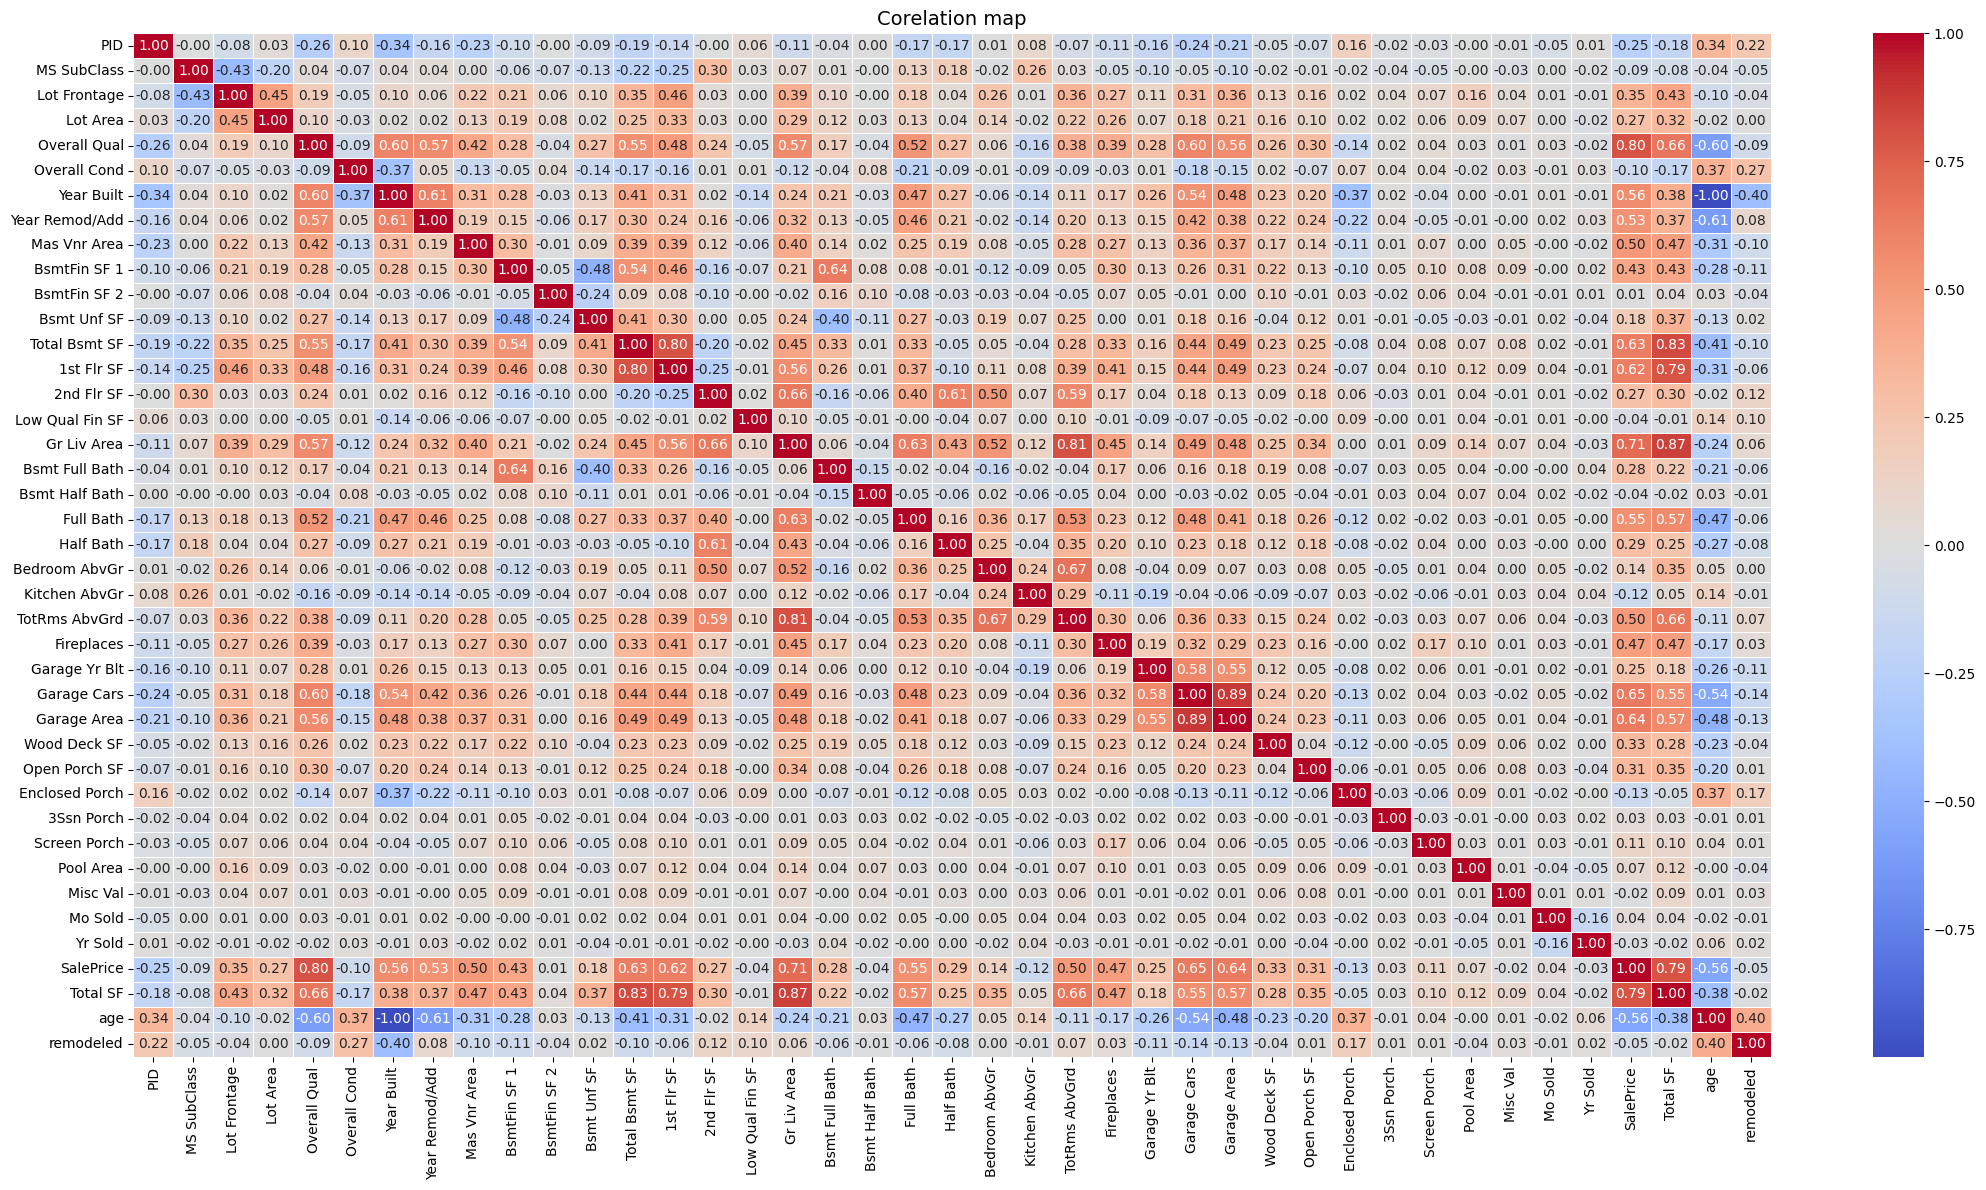

In [32]:
plt.figure(figsize=(22, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Corelation map", fontsize=14)
plt.tight_layout()
plt.show()

#### Feature corelation on log-transformed data

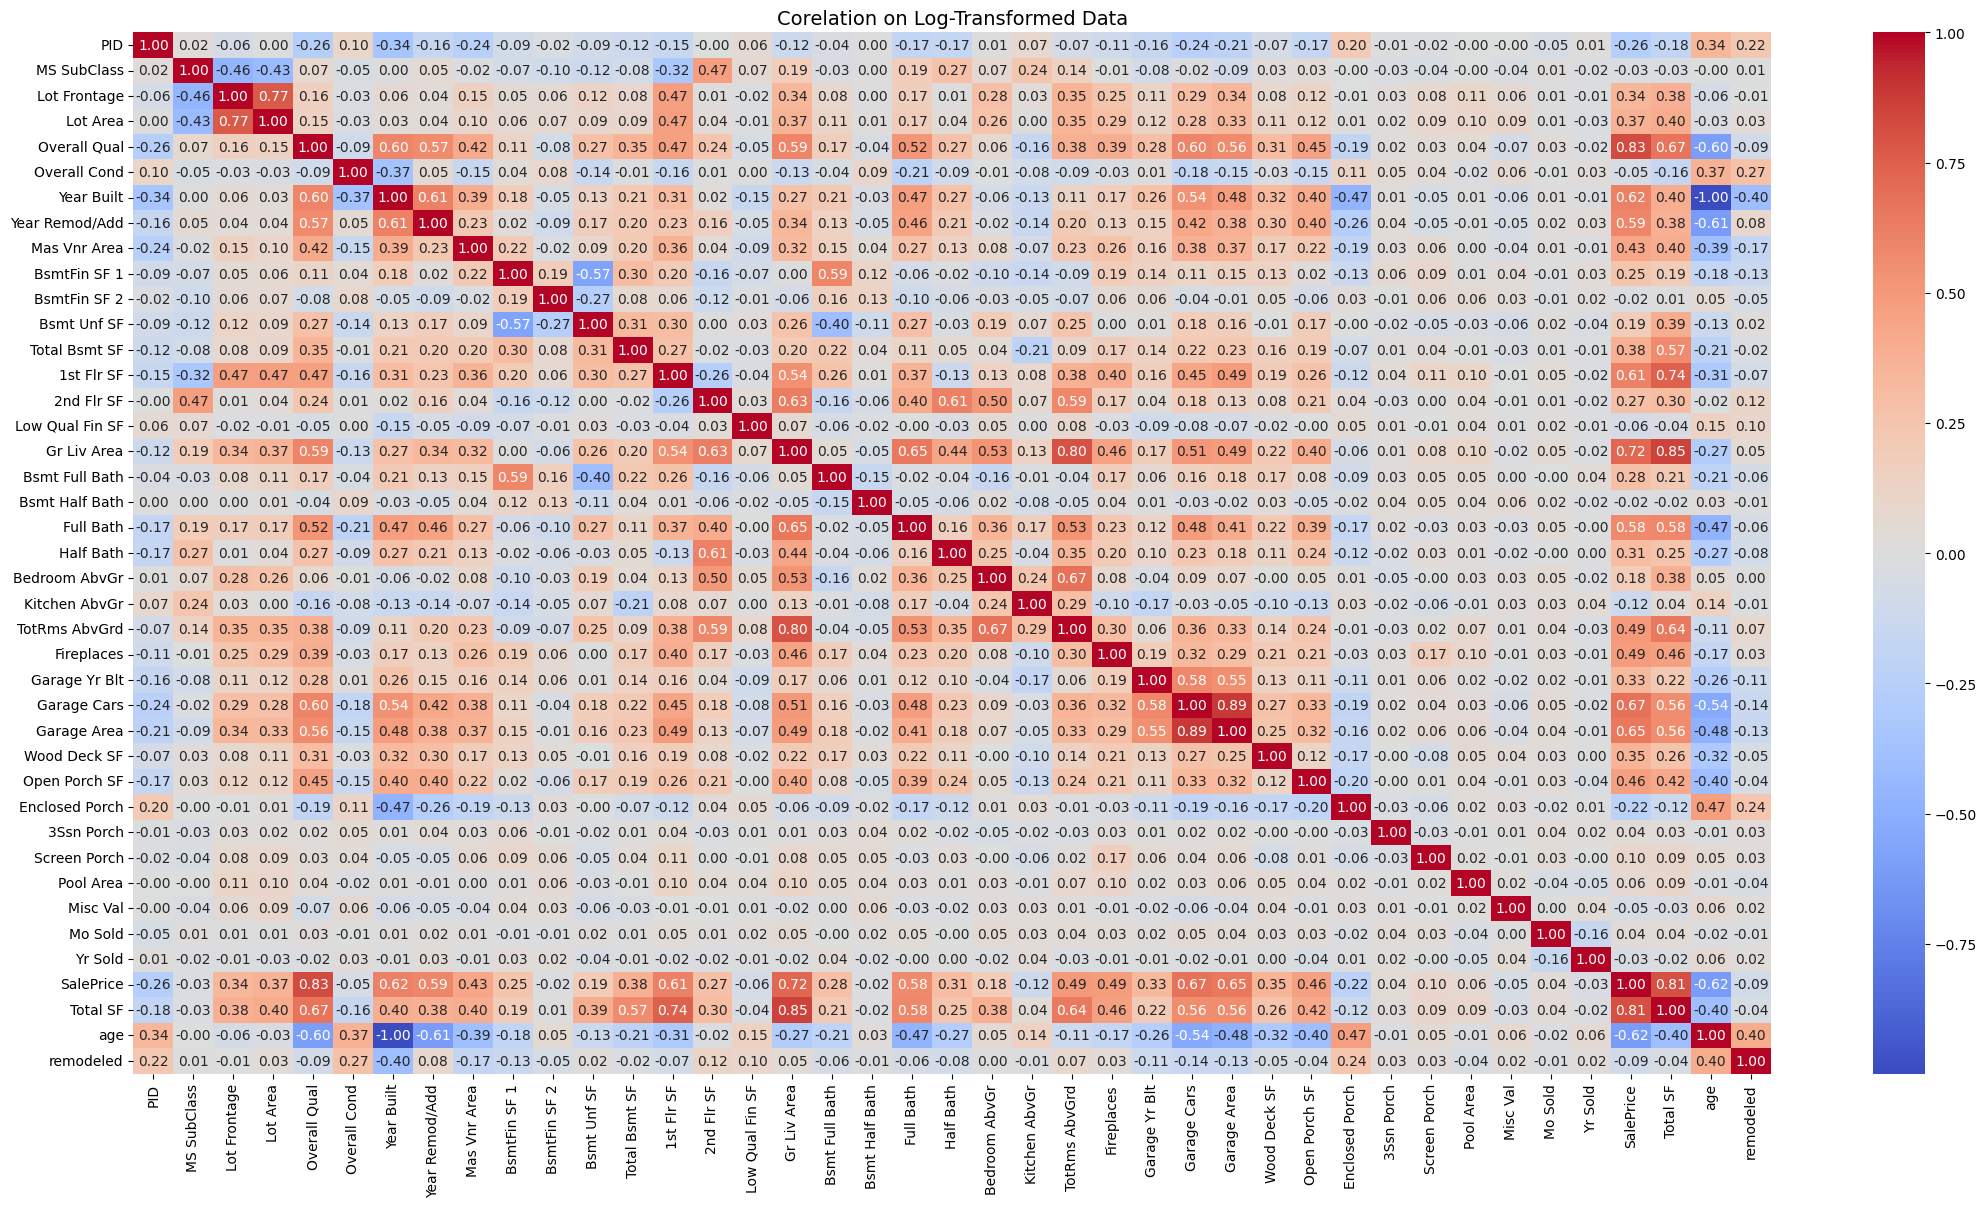

In [33]:
plt.figure(figsize=(22,12))
sns.heatmap(df_log.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.tight_layout()
plt.title("Corelation on Log-Transformed Data", fontsize=14)
plt.show()

### Univariate Analysis

##### Numerical features

Text(0.5, 1.0, 'Distribution of SalePrice on original data')

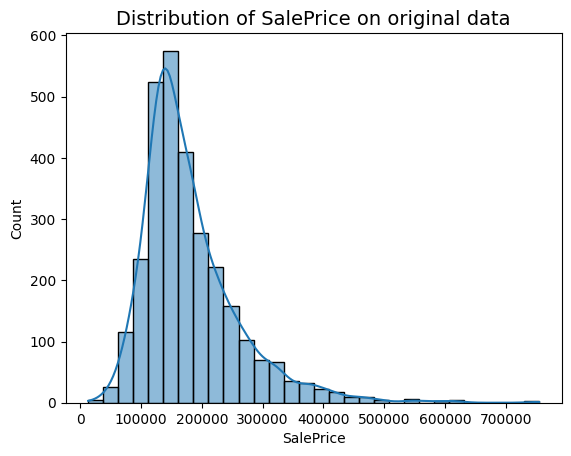

In [34]:
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title("Distribution of SalePrice on original data", fontsize=14)

<Axes: xlabel='SalePrice', ylabel='Count'>

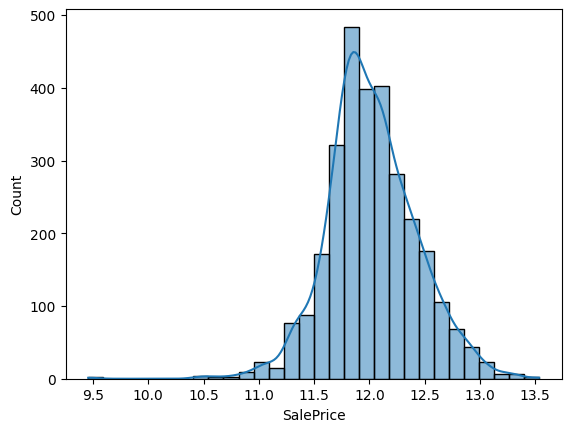

In [35]:
sns.histplot(df_log['SalePrice'], bins=30, kde= True)

Text(0.5, 1.0, 'Boxplot of SalePrice')

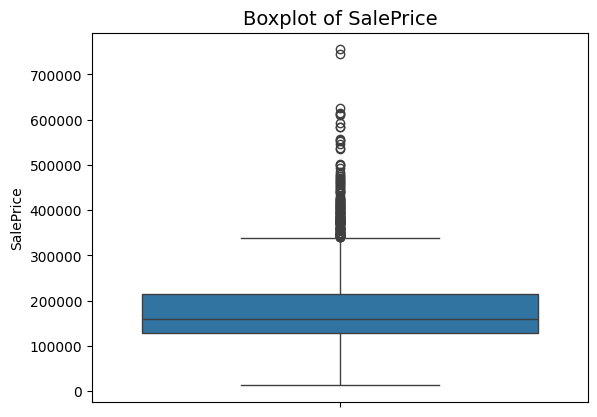

In [36]:
sns.boxplot(df['SalePrice'])
plt.title("Boxplot of SalePrice", fontsize=14)

##### Countplots

Text(0.5, 1.0, 'Countplot of Neighborhood')

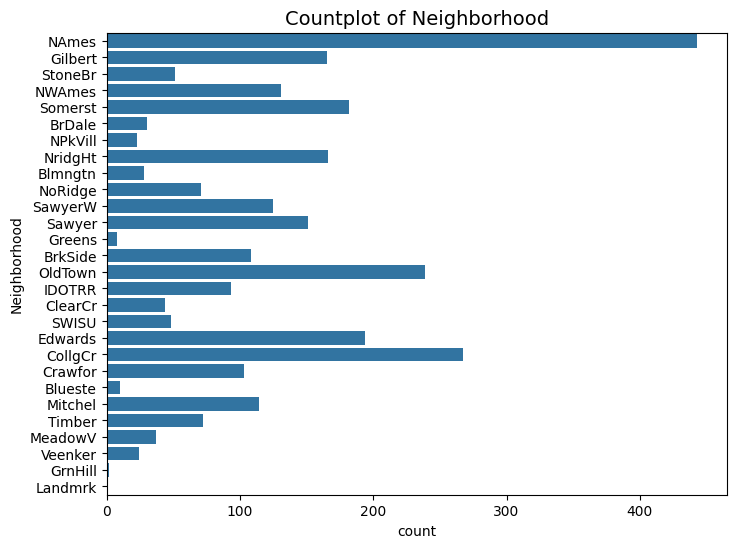

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(df['Neighborhood'])
plt.title("Countplot of Neighborhood", fontsize=14)

Text(0.5, 1.0, 'Countplot of MS Zoning')

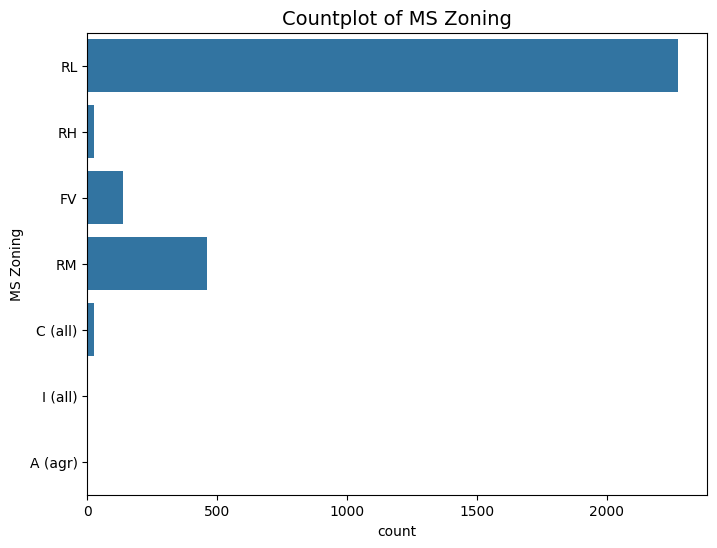

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(df['MS Zoning'])
plt.title("Countplot of MS Zoning", fontsize=14)

Text(0.5, 1.0, 'Violin plot on 1st Flr SF')

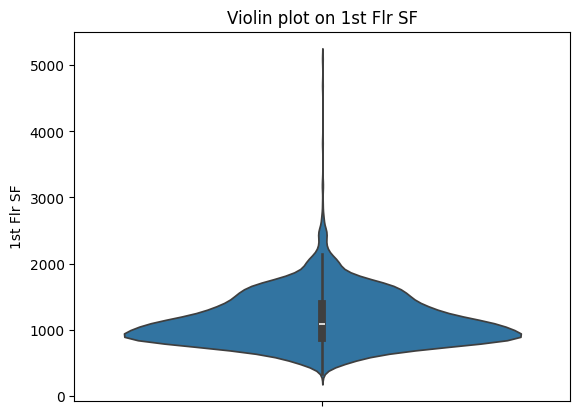

In [39]:
sns.violinplot(df['1st Flr SF'])
plt.title("Violin plot on 1st Flr SF")

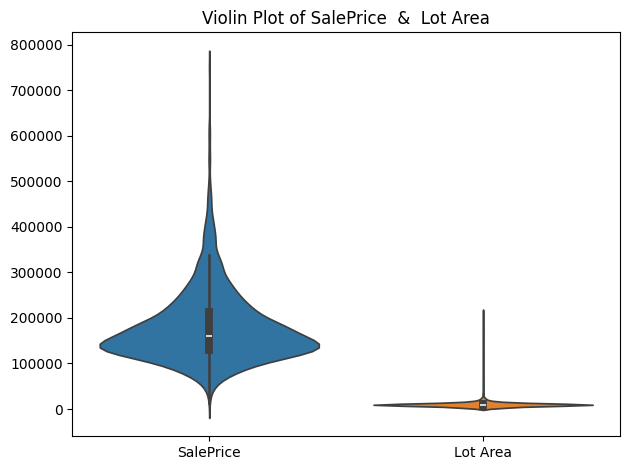

In [40]:
sns.violinplot(df[['SalePrice', 'Lot Area']])
plt.title("Violin Plot of SalePrice  &  Lot Area")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Gr Liv Area')

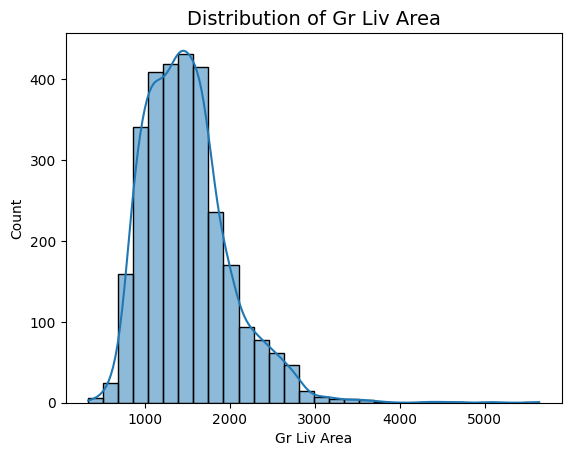

In [41]:
sns.histplot(df['Gr Liv Area'], bins=30, kde=True)
plt.title("Distribution of Gr Liv Area", fontsize=14)

Text(0.5, 1.0, 'Distribution of Lot Area')

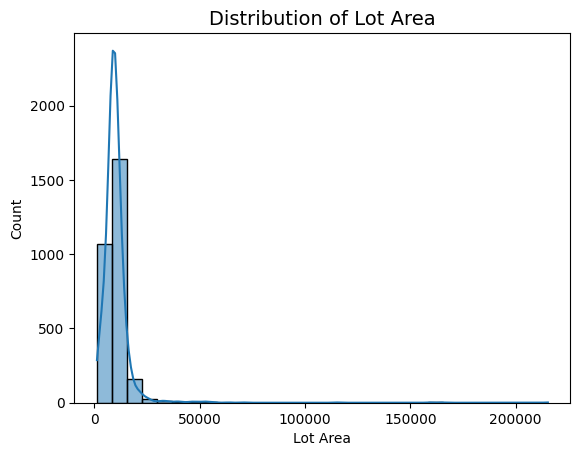

In [42]:
sns.histplot(df['Lot Area'], bins=30, kde=True)
plt.title("Distribution of Lot Area", fontsize=14)

### Bivariate Analysis

##### Numerical vs Numerical

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

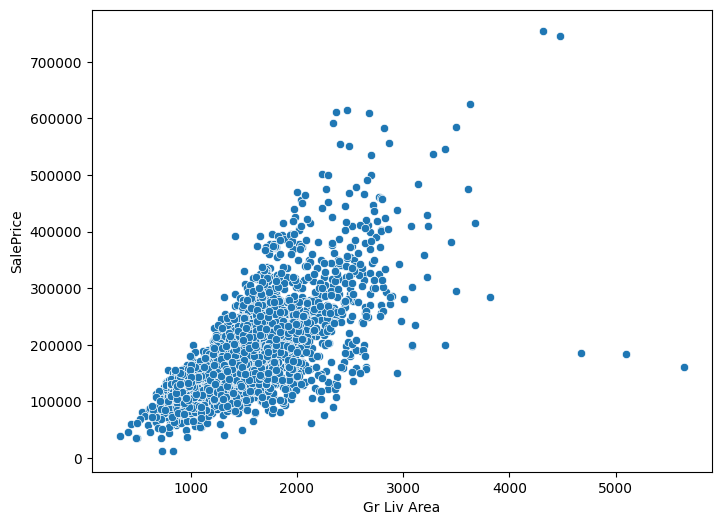

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(y = df['SalePrice'], x = df['Gr Liv Area'])

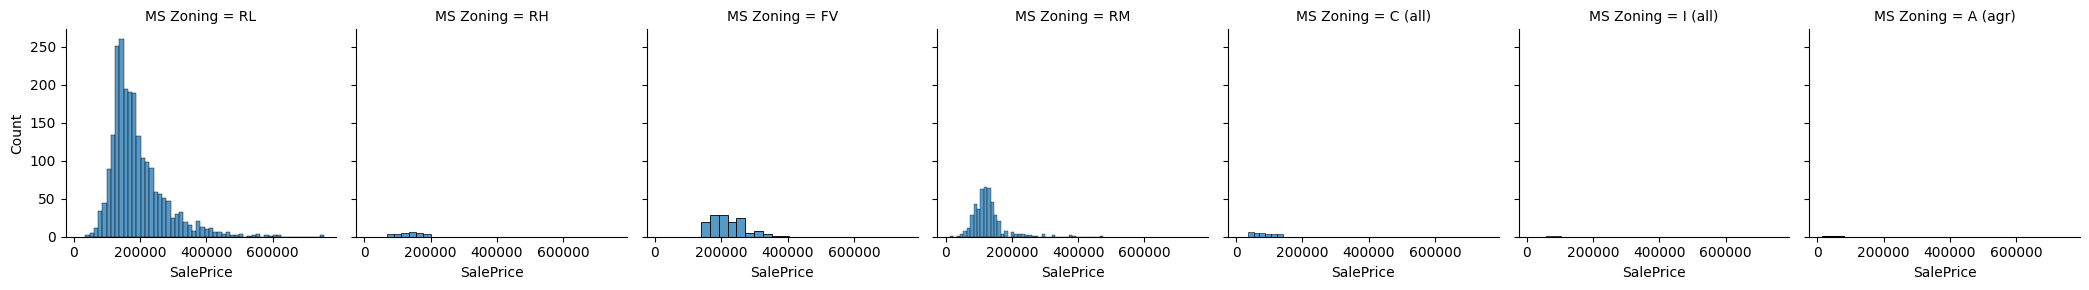

In [44]:
g = sns.FacetGrid(df, col="MS Zoning")
g.map(sns.histplot, "SalePrice")

Text(0.5, 1.0, 'Overall Qual vs SalePrice')

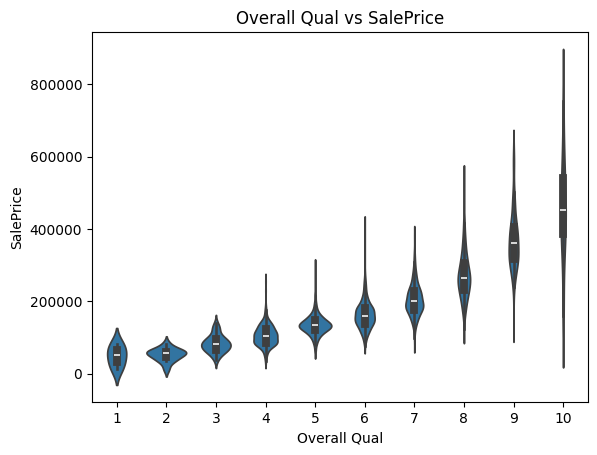

In [45]:
sns.violinplot(x=df['Overall Qual'], y=df['SalePrice'])
plt.title("Overall Qual vs SalePrice")

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

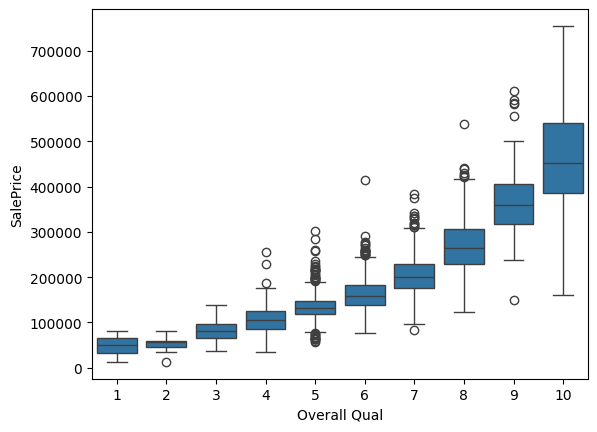

In [46]:
sns.boxplot(x=df['Overall Qual'], y=df['SalePrice'])

#### Gr Liv Area  &  SalePrice according to Fireplaces

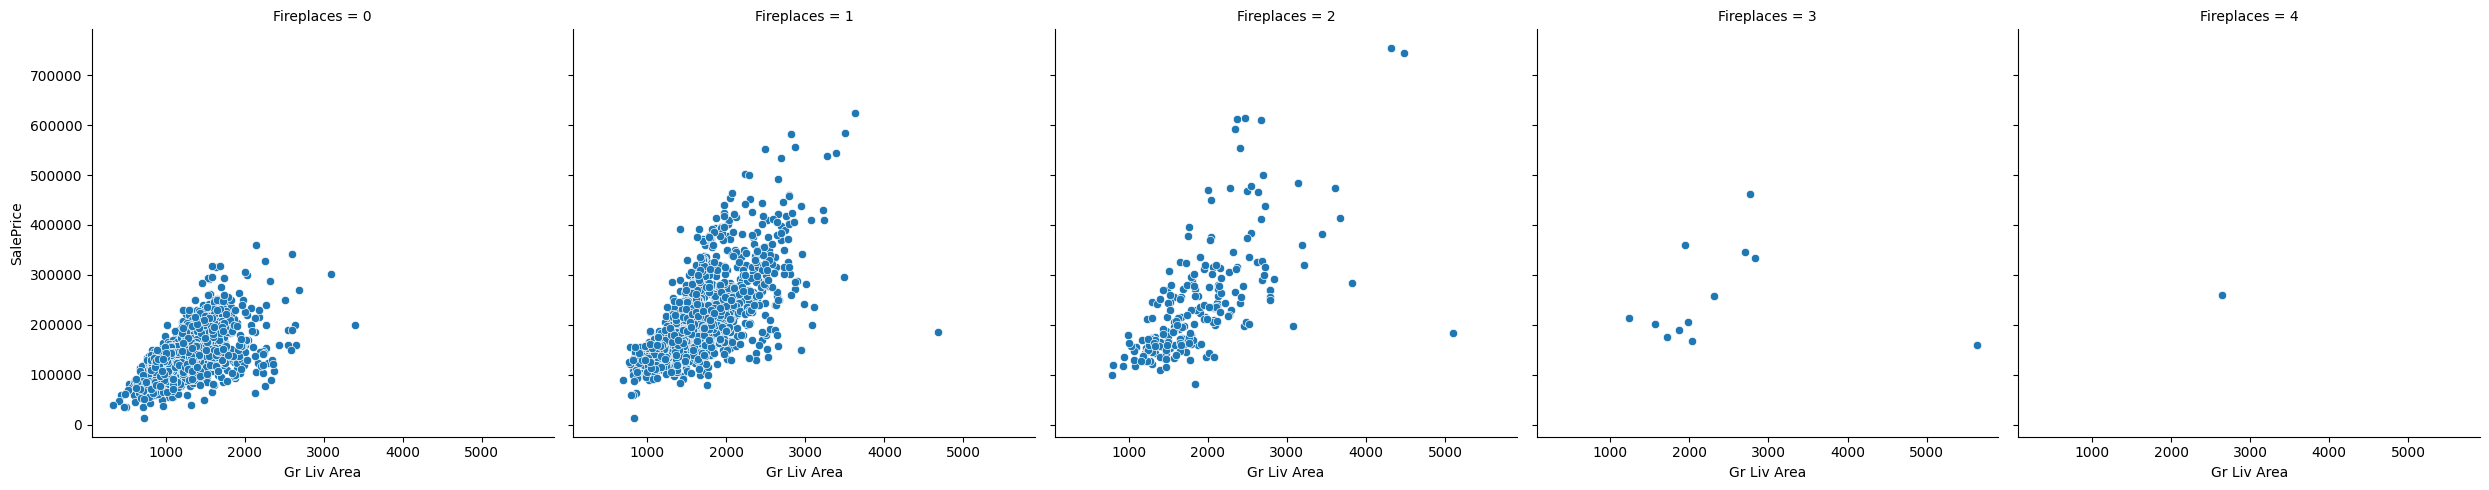

In [47]:
sns.relplot(x='Gr Liv Area', y='SalePrice', col=df['Fireplaces'], data=df)

### Age  vs  SalePrice barplot

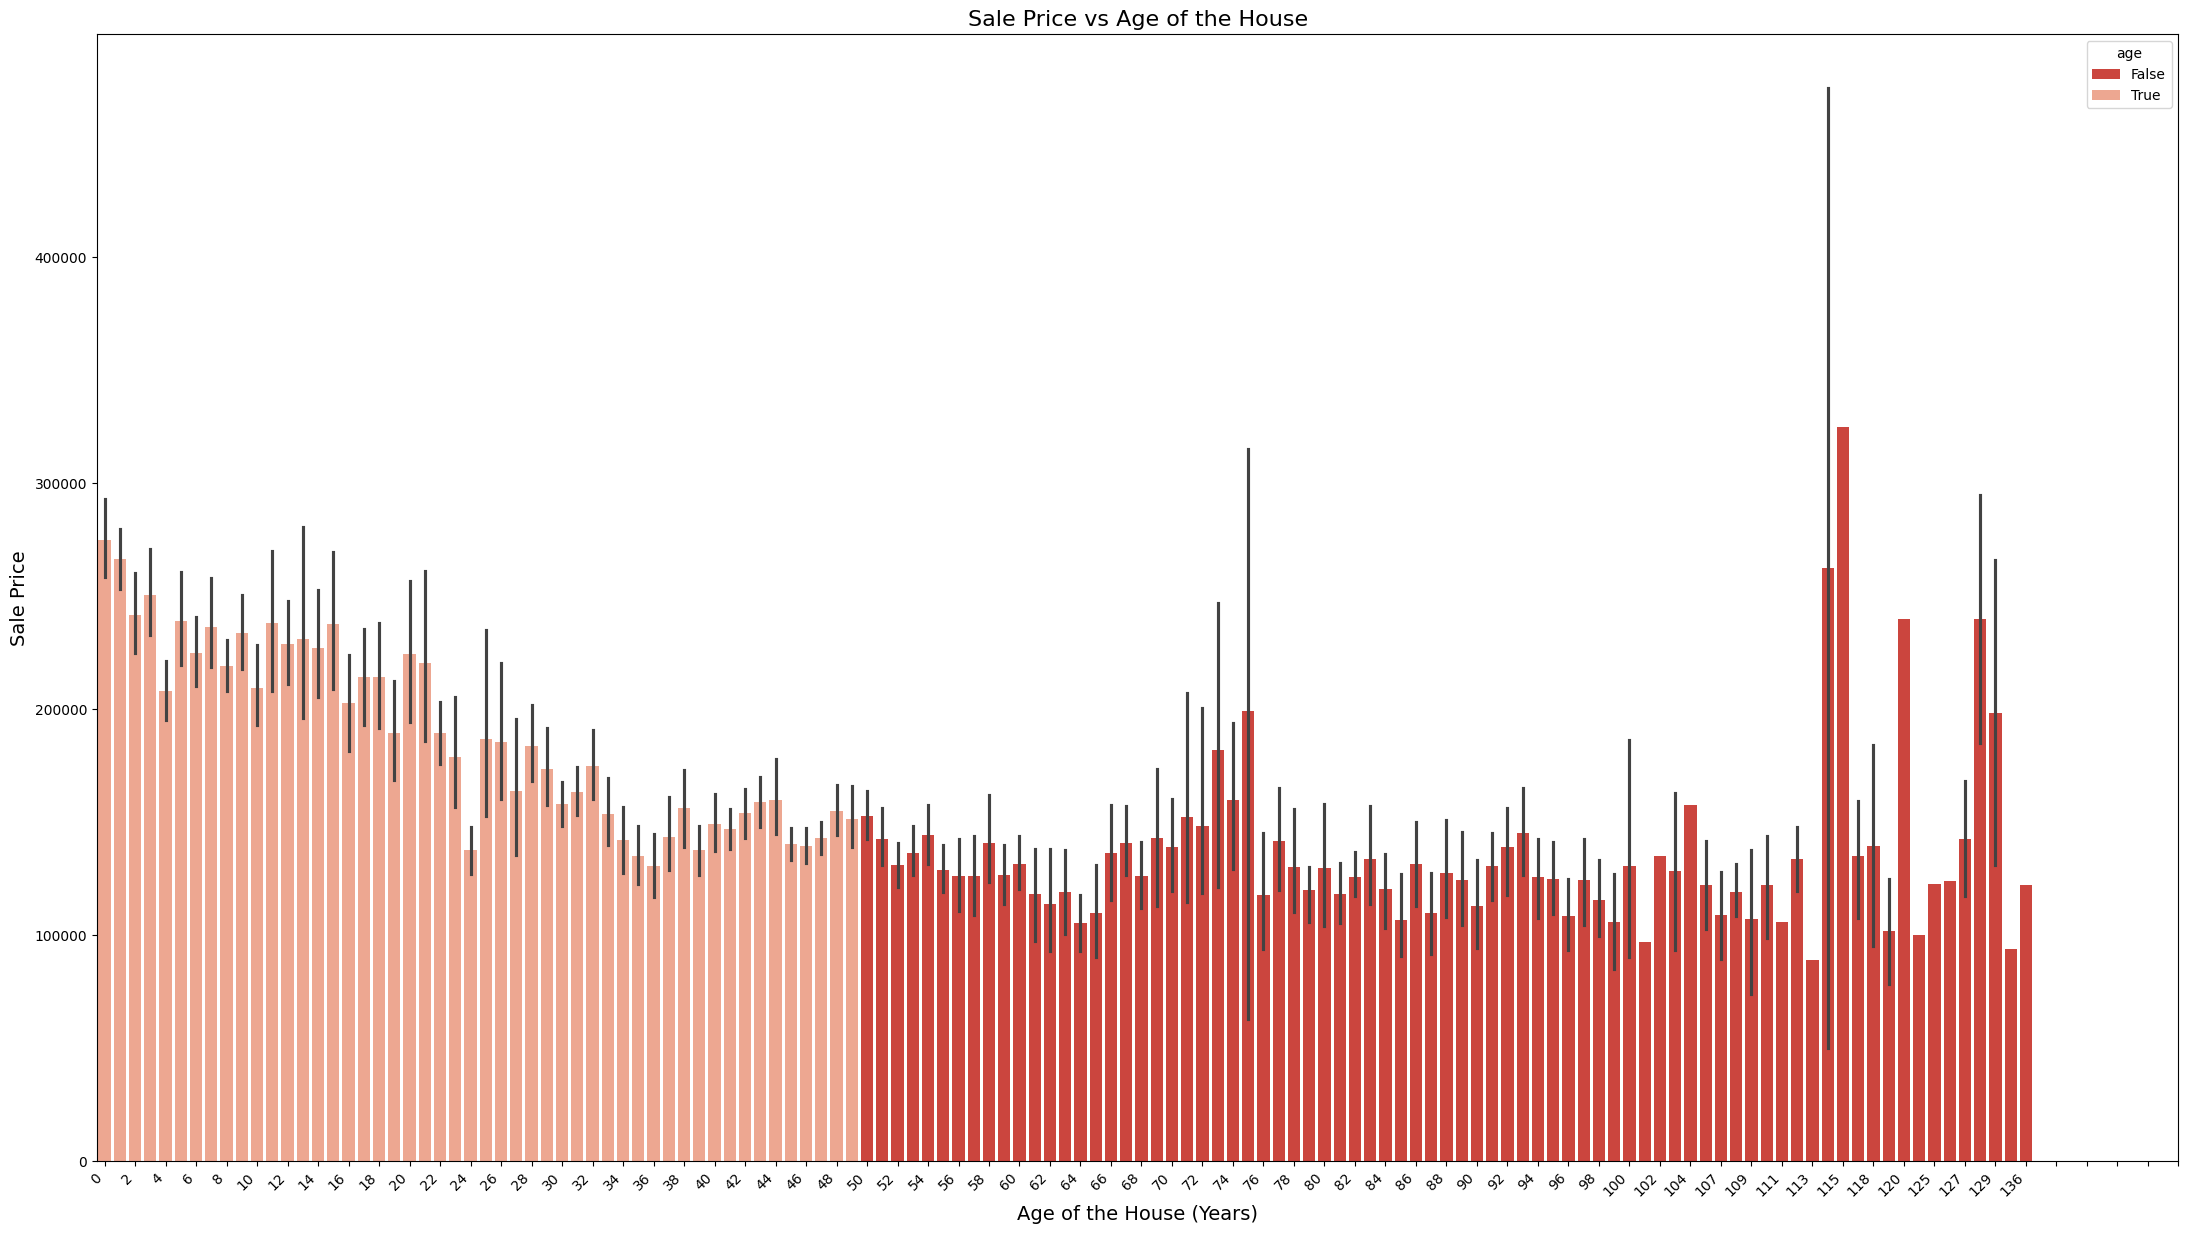

In [48]:
plt.figure(figsize=(22,12))
sns.barplot(x='age', y='SalePrice', data=df, hue= df['age'] < 50, palette='Reds_r')
plt.tight_layout()
min_age = min(df['age'])
max_age = max(df['age'])

interval = 2
desired_ticks = np.arange(min_age, max_age + interval, interval)
plt.xticks(desired_ticks)
plt.xticks(rotation=45, ha='right')
plt.title("Sale Price vs Age of the House", fontsize=16)
plt.xlabel('Age of the House (Years)', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

### Age  vs  SalePrice boxplot

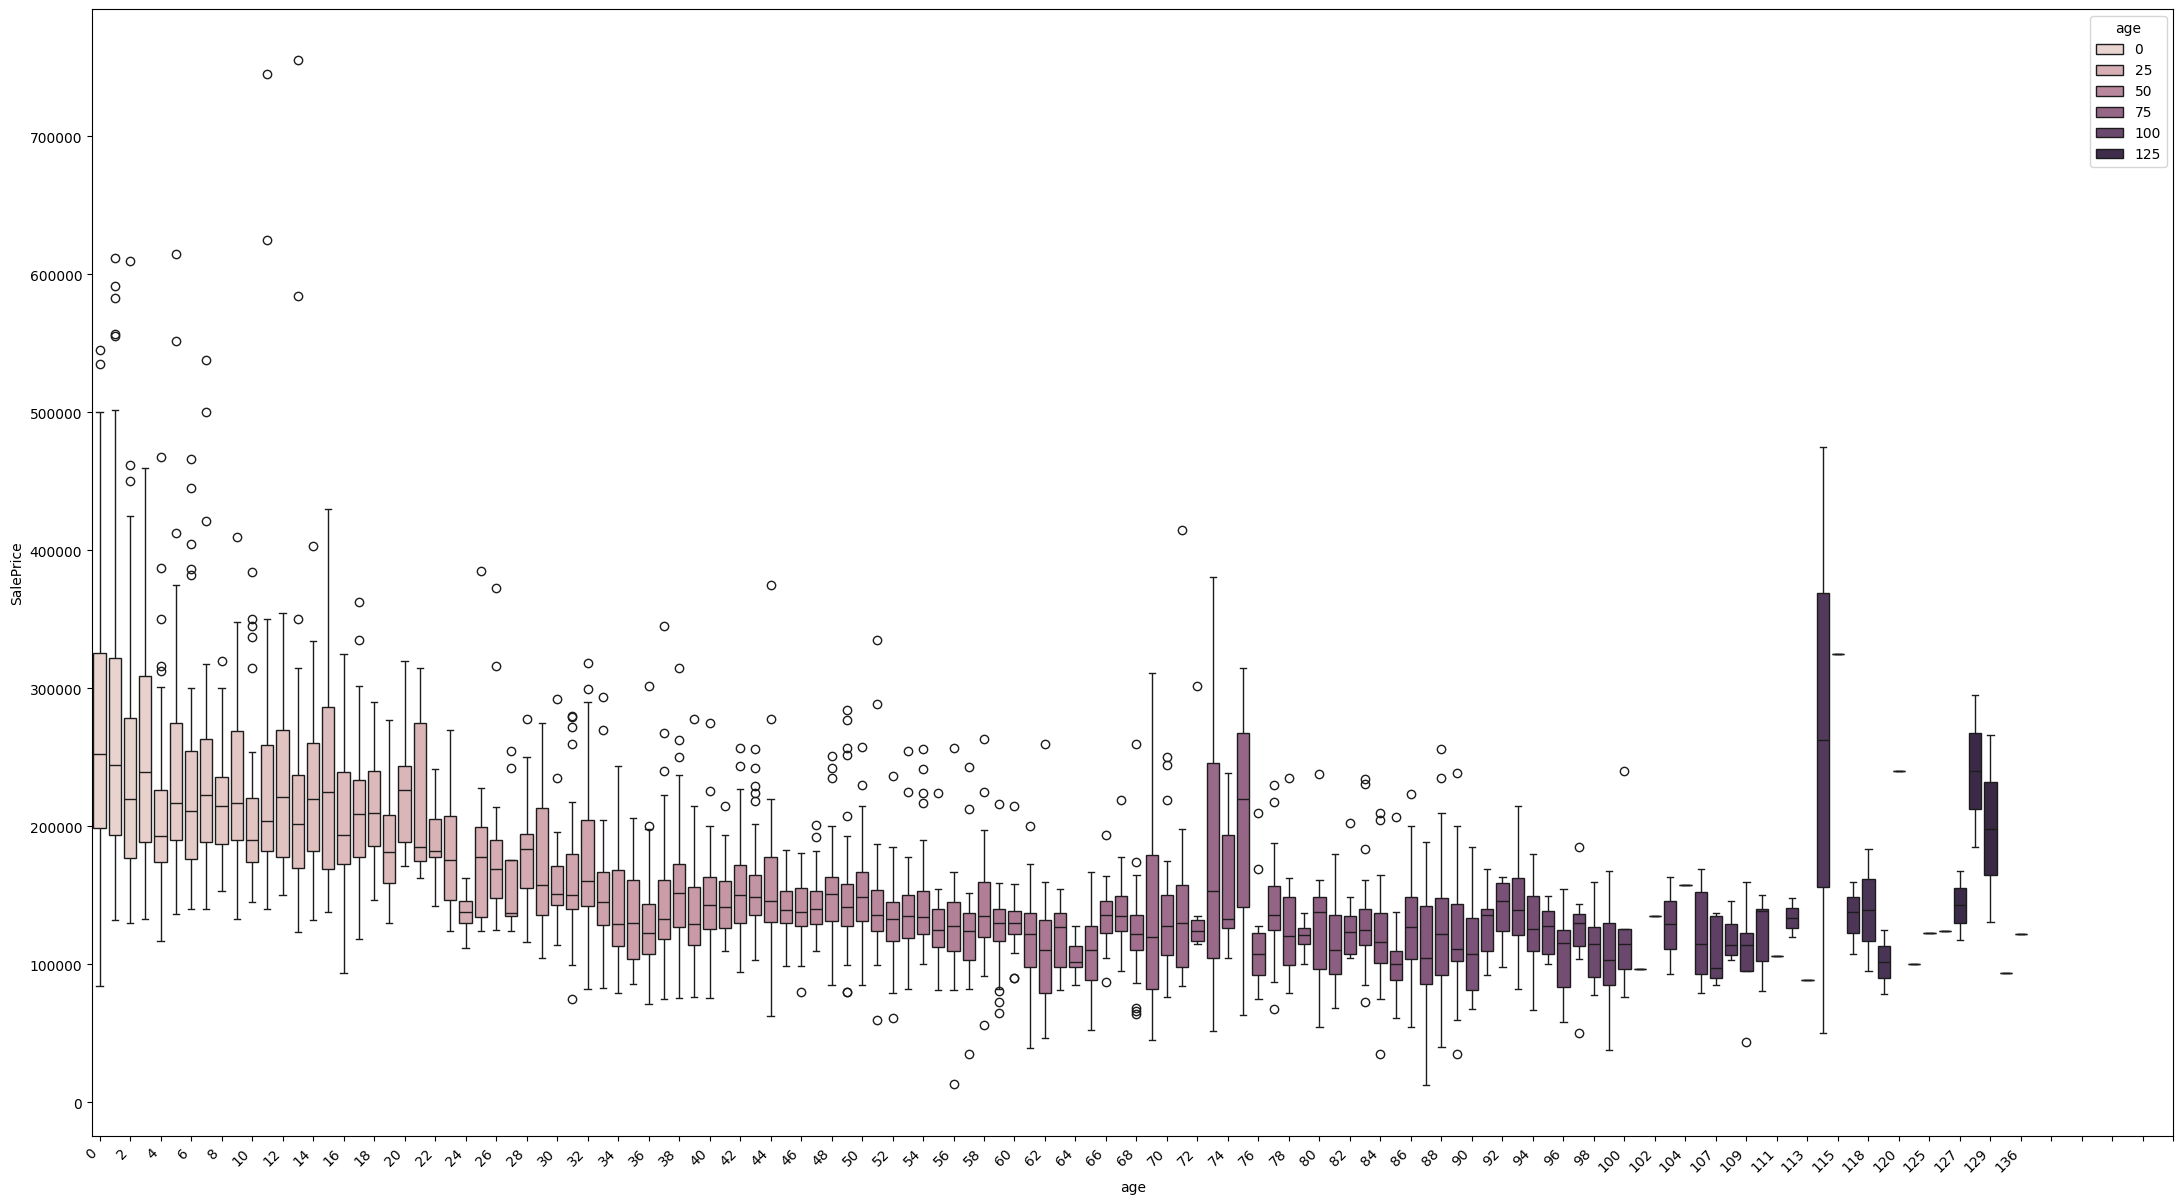

In [49]:
plt.figure(figsize=(22,12))
sns.boxplot(x='age', y='SalePrice', data=df, hue=df['age'])
plt.tight_layout()
min_age = min(df['age'])
max_age = max(df['age'])

interval = 2
desired_ticks = np.arange(min_age, max_age + interval, interval)
plt.xticks(desired_ticks)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Pairplot

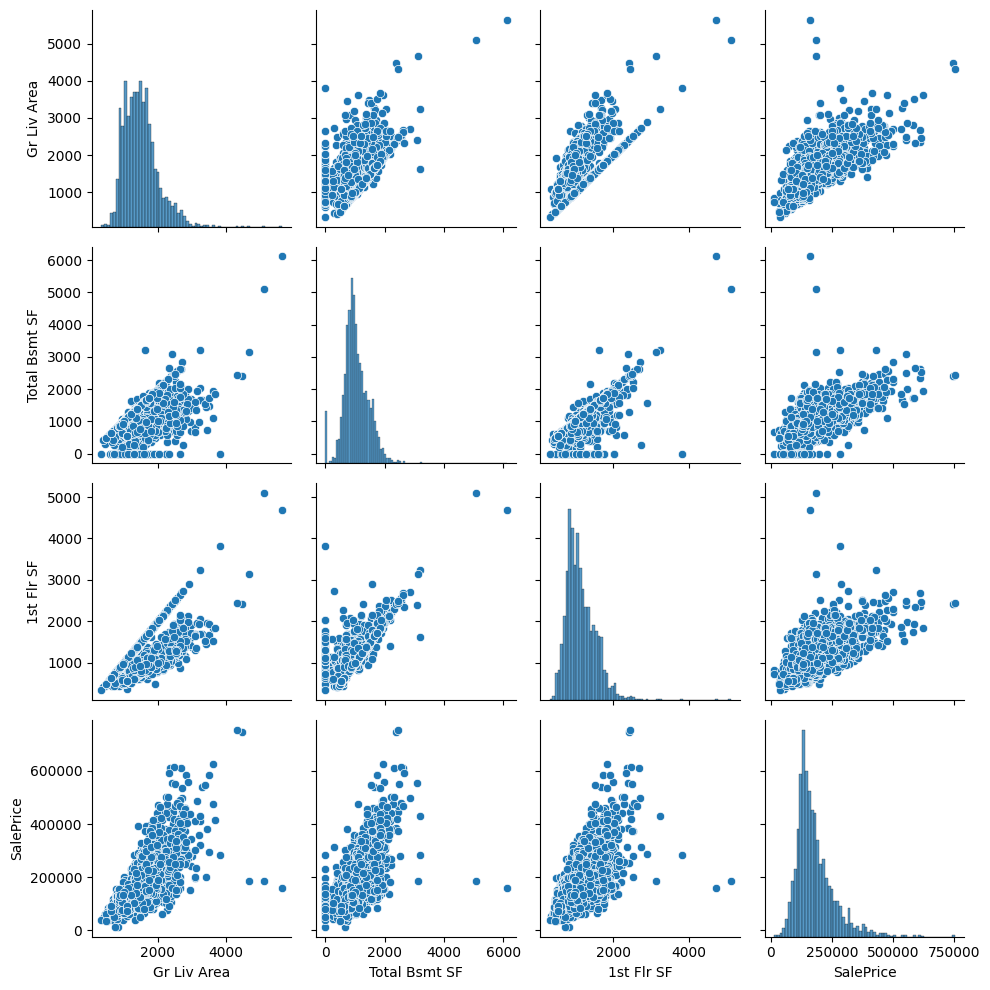

In [50]:
selected = ['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'SalePrice']
sns.pairplot(df[selected])
plt.tight_layout()
plt.show()

#### Multivariate analysis

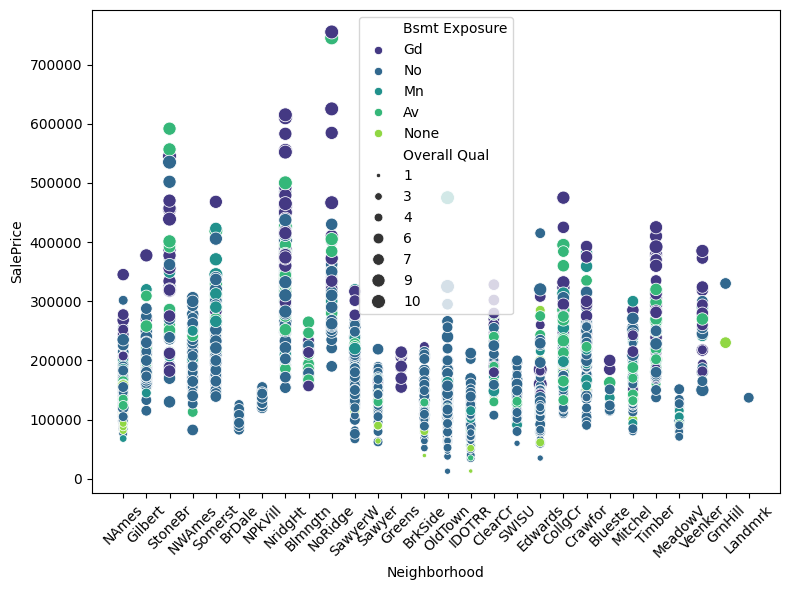

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(y = df['SalePrice'], x = df['Neighborhood'], hue = df['Bsmt Exposure'], size=df['Overall Qual'], sizes= (10,100), palette='viridis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

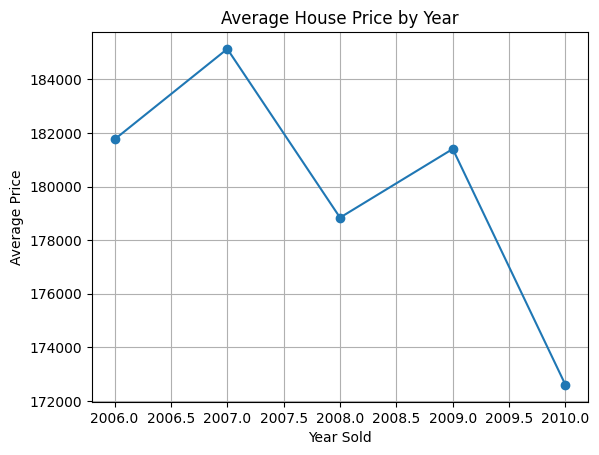

In [52]:
avg_prices_by_year = df.groupby('Yr Sold')['SalePrice'].mean()
avg_prices_by_year.plot(kind='line', marker='o', title='Average House Price by Year')
plt.xlabel('Year Sold')
plt.ylabel('Average Price')
plt.grid()
plt.show()

<Axes: >

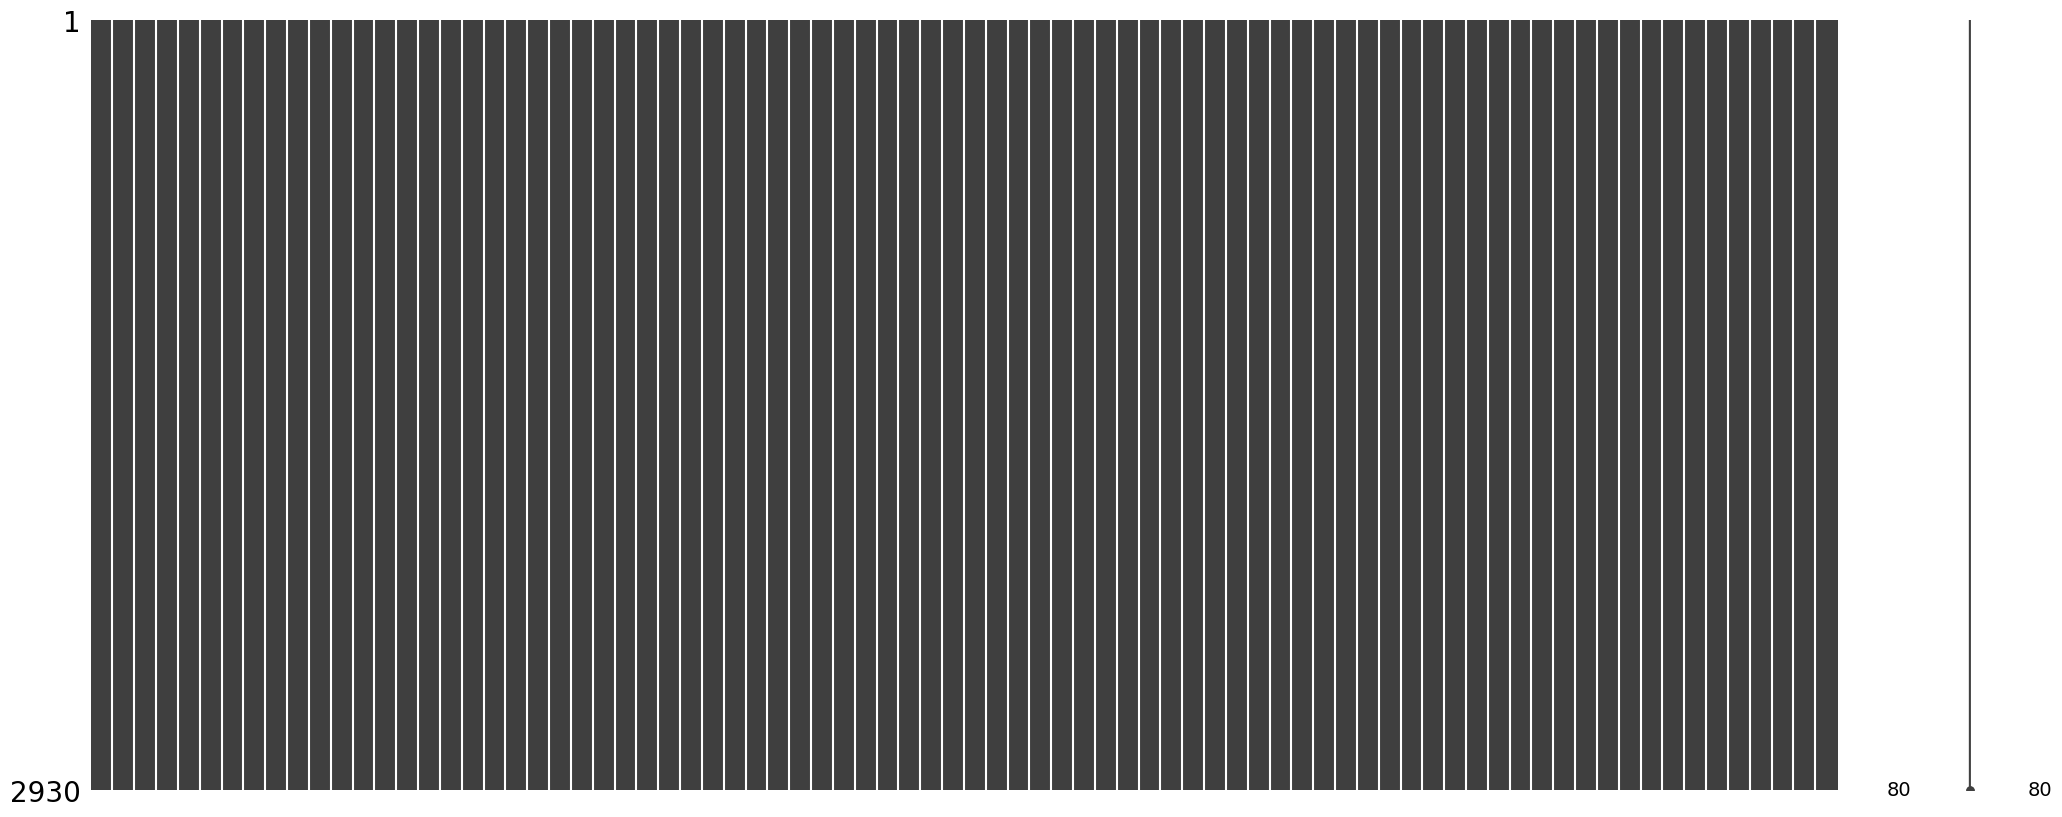

In [53]:
msno.matrix(df)

### Z_score

In [54]:
X_raw = df.drop(['SalePrice', 'PID'], axis=1, errors='ignore')
y_raw = df['SalePrice']

num_cols = X_raw.select_dtypes(include=['int64','float64']).columns
cat_cols = X_raw.select_dtypes(include='object').columns

X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

train_df_combined = pd.concat([X_train[num_cols], y_train], axis = 1)

z_score_values = stats.zscore(train_df_combined)

z_score_train = pd.DataFrame(z_score_values, index=train_df_combined.index, columns=train_df_combined.columns)

filtered_indices_mask = (np.abs(z_score_train) < 4).all(axis=1)


X_train_clean = X_train[filtered_indices_mask]
y_train_clean = y_train[filtered_indices_mask]


print(f"Original X_train shape: {X_train.shape}")
print(f"Cleaned X_train shape: {X_train_clean.shape} (Removed {X_train.shape[0] - X_train_clean.shape[0]} outliers)")

Original X_train shape: (2344, 78)
Cleaned X_train shape: (1950, 78) (Removed 394 outliers)


##### Outlier detection

Text(0.5, 1.0, 'Distribution of SalePrice before removing outliers')

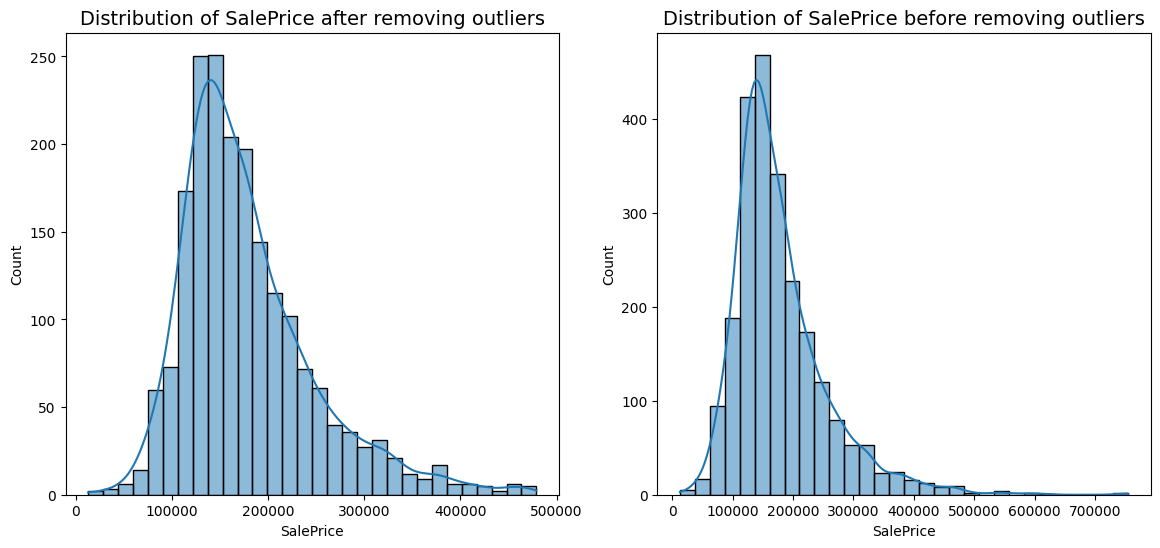

In [55]:
fig, axes  = plt.subplots(1, 2, figsize=(14, 6)) 
axes[0] =sns.histplot(y_train_clean, bins=30, kde=True, ax = axes[0])
axes[0].set_title("Distribution of SalePrice after removing outliers", fontsize=14)

axes[1] = sns.histplot(y_train, bins=30, kde=True, ax = axes[1])
axes[1].set_title("Distribution of SalePrice before removing outliers", fontsize=14)

>## **Modelling Phase**

>#### Linear regression model on Log-Transformed Data

In [56]:
X_log = df_encoded_log.drop(['SalePrice', 'PID'], axis=1)
y_log = df_encoded_log['SalePrice']

In [57]:
scaler = StandardScaler()
X_log_scaled = scaler.fit_transform(X_log)

X_log_scaled = pd.DataFrame(
    scaler.fit_transform(X_log),
    columns=X_log.columns,
    index=X_log.index
)


In [58]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log_scaled, y_log, test_size= 0.2, random_state=42)

model_lr = LinearRegression().fit(X_train_log, y_train_log)
y_pred_lr = model_lr.predict(X_test_log)

print("R² LR:", r2_score(y_test_log, y_pred_lr))
print("RMSE LR:", np.sqrt(mean_squared_error(y_test_log, y_pred_lr)))
# np.expm1(y_pred_lr).round(2)          

R² LR: 0.9095881531545799
RMSE LR: 0.12934001352123906


#### Linear Regression model on original encoded data

In [59]:
X_org = df_encoded.drop(['SalePrice', 'PID'], axis=1)
y_org = df_encoded['SalePrice']

In [60]:
scaler = StandardScaler()
# X_org_scaled = scaler.fit_transform(X_org)

X_org_scaled = pd.DataFrame(
    scaler.fit_transform(X_org),
    columns=X_org.columns,
    index=X_org.index
)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_org_scaled, y_org, test_size= 0.2, random_state=42)

model_lr_org = LinearRegression().fit(X_train, y_train)
y_pred_lr_org = model_lr_org.predict(X_test)

>#### Random forest regressor

In [62]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_log, y_train_log)
y_pred_rf = model_rf.predict(X_test_log)

#### Feature importance Plot

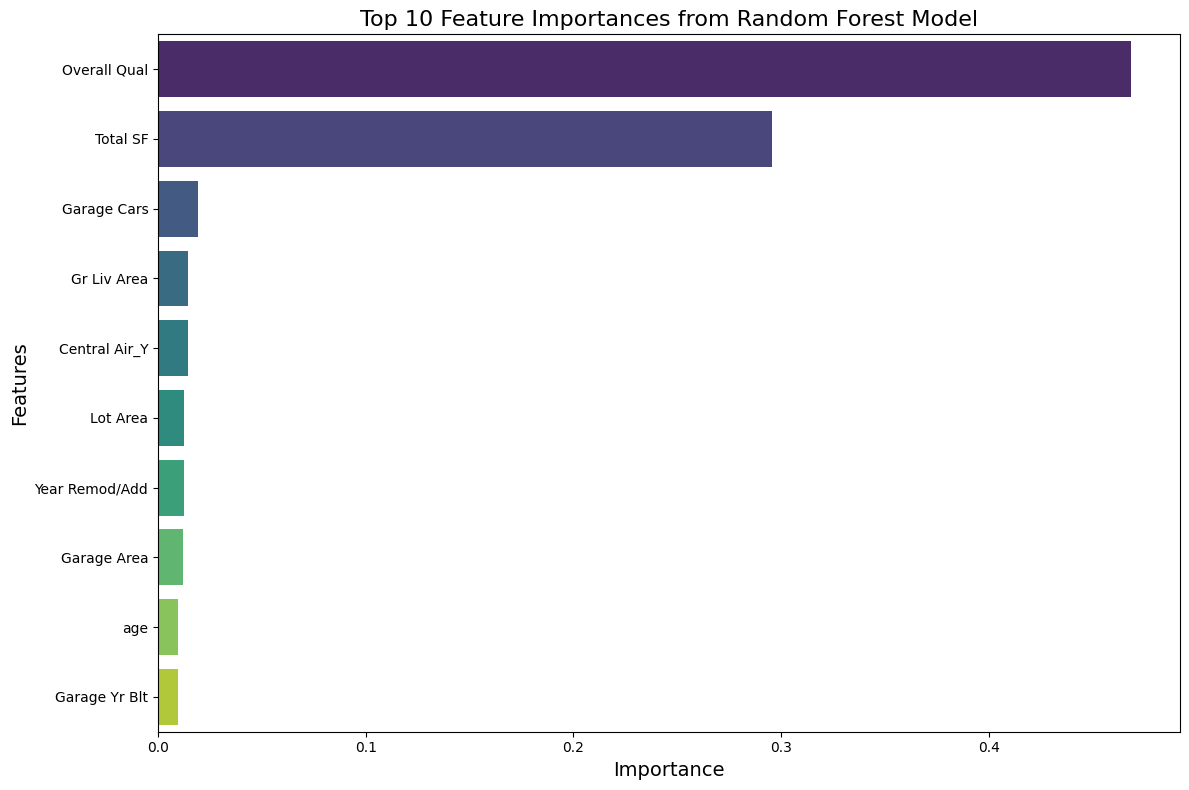

In [63]:
importances = pd.Series((model_rf.feature_importances_), index = X_log.columns)

top_features = importances.nlargest(10)
plt.figure(figsize=(12, 8))

sns.barplot(x=top_features, y = top_features.index, palette='viridis', hue = top_features.index, legend=False)
plt.title("Top 10 Feature Importances from Random Forest Model", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()

>## Models evaluation

### Model evaluation function

In [64]:
def evaluate_model(model, X_test, y_test):
    X_test = np.expm1(X_test)
    y_test = np.expm1(y_test)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    # accuracy = model.score(y_test, y_pred)
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")
    # return mae, rmse, r2

In [65]:
print("Evaluation of linear regression model: ")
evaluate_model(model_lr, X_test_log, y_test_log)


print("\n\nRandom Forest Regressor: ")
evaluate_model(model_rf, X_test_log, y_test_log)

Evaluation of linear regression model: 
MAE: 3563074118749.42, RMSE: 83297640323360.53, R²: -865413832662220160.0000


Random Forest Regressor: 
MAE: 189639.33, RMSE: 209715.43, R²: -4.4855


#### Custom data for predictions

In [66]:
#### Custom dataset predictions
custom_raw_df = pd.DataFrame([{
    'PID': 527105010,
    'MS SubClass': 60,
    'MS Zoning': 'RL',
    'Lot Frontage': 74.0,
    'Lot Area': 13830,
    'Street': 'Pave',
    'Lot Shape': 'IR1',
    'Land Contour': 'Lvl',
    'Utilities': 'AllPub',
    'Lot Config': 'Inside',
    'Land Slope': 'Gtl',
    'Neighborhood': 'Gilbert',
    'Condition 1': 'Norm',
    'Condition 2': 'Norm',
    'Bldg Type': '1Fam',
    'House Style': '2Story',
    'Overall Qual': 5,
    'Overall Cond': 5,
    'Year Built': 1997,
    'Year Remod/Add': 1998,
    'Roof Style': 'Gable',
    'Roof Matl': 'CompShg',
    'Exterior 1st': 'VinylSd',
    'Exterior 2nd': 'VinylSd',
    'Mas Vnr Type': 'None',
    'Mas Vnr Area': 0.0,
    'Exter Qual': 'TA',
    'Exter Cond': 'TA',
    'Foundation': 'PConc',
    'Bsmt Qual': 'Gd',
    'Bsmt Cond': 'TA',
    'Bsmt Exposure': 'No',
    'BsmtFin Type 1': 'GLQ',
    'BsmtFin SF 1': 791.0,
    'BsmtFin Type 2': 'Unf',
    'BsmtFin SF 2': 0.0,
    'Bsmt Unf SF': 137.0,
    'Total Bsmt SF': 928.0,
    'Heating': 'GasA',
    'Heating QC': 'Gd',
    'Central Air': 'Y',
    'Electrical': 'SBrkr',
    '1st Flr SF': 928,
    '2nd Flr SF': 701,
    'Low Qual Fin SF': 0,
    'Gr Liv Area': 1629,
    'Bsmt Full Bath': 0.0,
    'Bsmt Half Bath': 0.0,
    'Full Bath': 2,
    'Half Bath': 1,
    'Bedroom AbvGr': 3,
    'Kitchen AbvGr': 1,
    'Kitchen Qual': 'TA',
    'TotRms AbvGrd': 6,
    'Functional': 'Typ',
    'Fireplaces': 1,
    'Fireplace Qu': 'TA',
    'Garage Type': 'Attchd',
    'Garage Yr Blt': 1997.0,
    'Garage Finish': 'Fin',
    'Garage Cars': 2.0,
    'Garage Area': 482.0,
    'Garage Qual': 'TA',
    'Garage Cond': 'TA',
    'Paved Drive': 'Y',
    'Wood Deck SF': 212,
    'Open Porch SF': 34,
    'Enclosed Porch': 0,
    '3Ssn Porch': 0,
    'Screen Porch': 0,
    'Pool Area': 0,
    'Misc Val': 0,
    'Mo Sold': 3,
    'Yr Sold': 2010,
    'Sale Type': 'WD',
    'Sale Condition': 'Normal',
    'SalePrice': 189900,
    'Total SF': 2557.0,
    'age': 13,
    'remodeled': True
}])

original_columns = df.columns.tolist()

skewed_features = skewed_cols

X_train_columns = X_log.columns

#### Function for Predictions 

In [67]:
def predict_custom_house(model, custom_raw_df, original_columns, skewed_features, X_train_columns):
    import numpy as np
    import pandas as pd

    # Drop unused columns
    custom_df = custom_raw_df.drop(['PID', 'SalePrice'], axis=1, errors='ignore')

    # Handle missing columns
    for col in skewed_features:
        if col in custom_df:
            custom_df[col] = np.log1p(custom_df[col])

    # One-hot encode
    custom_encoded = pd.get_dummies(custom_df)

    # Align with training columns
    custom_encoded = custom_encoded.reindex(columns=X_train_columns, fill_value=0)

    # Predict
    pred_log = model.predict(custom_encoded)
    pred_price = np.expm1(pred_log[0]).round(2)  # Inverse of log1p
    print(f"Predicted Sale Price: ")
    return pred_price

In [68]:
predict_custom_house(model_rf, custom_raw_df, original_columns, skewed_features, X_train_columns)

Predicted Sale Price: 


np.float64(292770.12)

>## Pipeline for Models

In [69]:
top_features = [
    'Overall Qual', 'Total SF', 'Garage Cars', 'Gr Liv Area', 'Central Air',
    'Lot Area', 'Year Remod/Add', 'Garage Area', 'age', 'Garage Yr Blt',
    'BsmtFin SF 1', 'Bsmt Unf SF', 'Year Built', 'Overall Cond',
    '1st Flr SF', 'Lot Frontage'
]

X_top = df[top_features]
y_top = df['SalePrice']

# X_raw = df.drop(['SalePrice', 'PID'], axis=1, errors='ignore')
# y_raw = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_top, y_top, test_size=0.2, random_state=42)

num_cols = X_top.select_dtypes(include=['int64','float64']).columns
cat_cols = X_top.select_dtypes(include='object').columns

In [70]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'median')),
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scalar', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

pipeline_gb = Pipeline([
    ('preprocesor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, min_samples_leaf=1))
])

param_grid_gb = {
    'model__n_estimators' : [100, 200],
    'model__learning_rate' : [0.05, 0.1],
    'model__max_depth' : [3, 5],
    'model__subsample' : [0.8, 1.0],
    'model__min_samples_split' : [4, 6],
    'model__min_samples_leaf' : [4, 6]
}

grid_search_gb = GridSearchCV(
    estimator=pipeline_gb,
    param_grid=param_grid_gb,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)


pipeline_xg = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xg.XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3))

])

param_grid_xg = {
    'model__n_estimators': [100, 250],
    'model__learning_rate' : [0.05, 0.1],
    'model__max_depth' : [3, 5],
    'model__colsample_bytree' : [0.8, 1.0]
}

grid_search_xg = GridSearchCV(
    estimator = pipeline_xg,
    param_grid = param_grid_xg,
    cv = 3,
    scoring = 'neg_mean_squared_error',
    verbose = 2,
    n_jobs = -1
)

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

param_grid_rf = {
    'model__n_estimators' : [100, 200],
    'model__min_samples_split' : [2, 4],
    'model__max_depth' : [3, 5],
    'model__min_samples_split' : [2, 4]
}

grid_search_rf = GridSearchCV(
    estimator= pipeline_rf,
    param_grid = param_grid_rf,
    verbose = 2,
    n_jobs = -1,
    cv = 3,
    scoring = 'neg_mean_squared_error'
)

>### Random forest regressor

In [71]:
model_rfr = pipeline_rf.fit(X_train, y_train)
model_rfr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['Overall Qual', 'Total SF', 'Garage Cars', 'Gr Liv Area', 'Lot Area',
       'Year Remod/Add', 'Garage Area', 'age', 'Garage Yr Blt', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Year Built', 'Overall Cond', '1st Flr SF',
       'Lot Frontage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Central Air'], dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [72]:
y_pred_rfr = model_rfr.predict(X_test)

In [73]:
joblib.dump(model, "randomforestregressor.pkl")

['randomforestregressor.pkl']

>### GridSearchCV RF best model

In [74]:
best_rf = grid_search_rf.fit(X_train, y_train)
best_rf

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                         ('scalar',
                                                                                          StandardScaler())]),
                                                                         Index(['Overall Qual', 'Total SF', 'Garage Cars', 'Gr Liv Area', 'Lot Area',
       'Year Remod/Add', 'Garage Area', 'age', 'Garage Yr B...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Central Air'], dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 5],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [75]:
y_pred_best_rf = best_rf.predict(X_test)

>#### Gradient boosting regressor

In [76]:
model_gb = pipeline_gb.fit(X_train, y_train)
model_gb

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['Overall Qual', 'Total SF', 'Garage Cars', 'Gr Liv Area', 'Lot Area',
       'Year Remod/Add', 'Garage Area', 'age', 'Garage Yr Blt', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Year Built', 'Overall Cond', '1st Flr SF',
       'Lot Frontage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Central Air'], dtype='object'))])),
                ('model', GradientBoostingRegressor(random_state=42))])

>#### GridSearchCV GB best model

In [77]:
best_gb = grid_search_gb.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


In [78]:
y_pred_best_gb = best_gb.predict(X_test)
best_gb

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocesor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                         ('scalar',
                                                                                          StandardScaler())]),
                                                                         Index(['Overall Qual', 'Total SF', 'Garage Cars', 'Gr Liv Area', 'Lot Area',
       'Year Remod/Add', 'Garage Area', 'age', 'Garage Yr Bl...
                                                                                                        sparse_output=False))]),
                                                                         Index(['Central Air'], dtype='object'))])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [3, 5],
                         'model__min_samples_leaf': [4, 6],
                         'model__min_samples_split': [4, 6],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [79]:
y_pred_gb = model_gb.predict(X_test)

>#### XGBoost

In [80]:
model_xg = pipeline_xg.fit(X_train, y_train)
model_xg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['Overall Qual', 'Total SF', 'Garage Cars', 'Gr Liv Area', 'Lot Area',
       'Year Remod/Add', 'Garage Area', 'age', 'Garage Yr Blt', 'BsmtFin SF 1',
       'Bsmt Unf SF'...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [81]:
y_pred_xg = model_xg.predict(X_test)
y_pred_best_xg = model_xg.predict(X_test)

>### GridSearchCV best XG fit

In [82]:
grid_xg_best = grid_search_xg.fit(X_train, y_train)
grid_xg_best

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                         ('scalar',
                                                                                          StandardScaler())]),
                                                                         Index(['Overall Qual', 'Total SF', 'Garage Cars', 'Gr Liv Area', 'Lot Area',
       'Year Remod/Add', 'Garage Area', 'age', 'Garage Yr B...
                                                     max_depth=3,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8, 1.0],
                         'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [3, 5],
                         'model__n_estimators': [100, 250]},
             scoring='neg_mean_squared_error', verbose=2)

>### Models Evaluation

In [83]:
def model_evaluation( model, y_raw, y_pred, model_name):
    mae = mean_absolute_error(y_raw, y_pred)
    rmse = np.sqrt(mean_squared_error(y_raw, y_pred))
    r2 = r2_score(y_raw, y_pred)
    print("Model: ", model_name)
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

In [84]:
model_evaluation(model_gb, y_test, y_pred_gb, "Gradient Boosting Regressor")
print("\n")
model_evaluation(model_xg, y_test, y_pred_xg, "XGBoost Regressor")
print("\n")
model_evaluation(model_rfr, y_test, y_pred_rfr, "RandomForestRegressor")
print("\n")
model_evaluation(best_gb, y_test, y_pred_best_gb, "GridSearchCV GB")
print("\n")
model_evaluation(grid_xg_best, y_test, y_pred_best_xg, "GridSearchCV XGBoost")
print("\n")
model_evaluation(best_rf, y_test, y_pred_best_rf, "GridSearchCV RF")

Model:  Gradient Boosting Regressor
MAE: 15639.69
RMSE: 26172.10
R² Score: 0.9146


Model:  XGBoost Regressor
MAE: 15642.98
RMSE: 24572.42
R² Score: 0.9247


Model:  RandomForestRegressor
MAE: 15823.62
RMSE: 27393.29
R² Score: 0.9064


Model:  GridSearchCV GB
MAE: 15766.74
RMSE: 25188.59
R² Score: 0.9209


Model:  GridSearchCV XGBoost
MAE: 15642.98
RMSE: 24572.42
R² Score: 0.9247


Model:  GridSearchCV RF
MAE: 19500.61
RMSE: 30857.08
R² Score: 0.8812


#### Evaluation Results

In [85]:
data = {
    'Model': [
        'Gradient Boosting Regressor',
        'XGBoost',
        'Random Forest Regressor',
        'GridSearchCV GB',
        'GridSearchCV XGB',
        'GridSearchCV RF'
    ],
    'MAE': [14706.44, 14893.08, 15337.05, 14192.78, 14893.08, 19230.89],
    'RMSE': [23057.04, 23829.37, 25068.72, 22778.84, 23829.37, 29775.98],
    'R2 Score': [0.9337, 0.9292, 0.9216, 0.9353, 0.9292, 0.8894]
}

evaluation_results = pd.DataFrame(data)
evaluation_results

,Model,MAE,RMSE,R2 Score
0,Gradient Boosting Regressor,14706.44,23057.04,0.9337
1,XGBoost,14893.08,23829.37,0.9292
2,Random Forest Regressor,15337.05,25068.72,0.9216
3,GridSearchCV GB,14192.78,22778.84,0.9353
4,GridSearchCV XGB,14893.08,23829.37,0.9292
5,GridSearchCV RF,19230.89,29775.98,0.8894


#### Saving evaluation results to CSV

In [86]:
evaluation_results.to_csv("Models Evaluation Results.csv")

>### Predictions

In [87]:
def price_prediction(model, data, model_name):
    predicted_price = model.predict(data)[0]
    print(f"Predicted House Price ({model_name}): ${predicted_price:.2f}")

In [88]:
price_prediction(model_gb, custom_raw_df, "GB")
price_prediction(model_xg, custom_raw_df, "XG")
price_prediction(model_rfr, custom_raw_df, "RF")
price_prediction(best_gb, custom_raw_df, "GridSearchCV GB")
price_prediction(grid_xg_best, custom_raw_df, "GridSearchCV XG")
price_prediction(best_rf, custom_raw_df, "GridSearchCV RF")

Predicted House Price (GB): $184921.57
Predicted House Price (XG): $188114.97
Predicted House Price (RF): $184870.00
Predicted House Price (GridSearchCV GB): $186764.58
Predicted House Price (GridSearchCV XG): $186577.83
Predicted House Price (GridSearchCV RF): $171145.36


>### Saving the best model 

In [89]:
joblib.dump(best_gb, "Best_model_gb.pkl")

['Best_model_gb.pkl']